## Exploratory anlysis of count data
Exploration of count dataset, along with available (selected) metadata.
This is to help us inform the preprocessing steps for the count data.

Setup

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import logging
import os
import sys
import json
import pickle

from IPython.display import Image
from IPython.display import display

In [2]:
# Setup project paths (assuming notebook is in notebooks/)
project_root = os.path.abspath('..')
sys.path.append(project_root)
print(f"Project Root: {project_root}")
print(f"Python Path: {sys.path}")

Project Root: /Users/elenki/Documents/UofU/spring-2025/deep-learning/semester_project/amd_dca
Python Path: ['/Users/elenki/anaconda3/lib/python311.zip', '/Users/elenki/anaconda3/lib/python3.11', '/Users/elenki/anaconda3/lib/python3.11/lib-dynload', '', '/Users/elenki/anaconda3/lib/python3.11/site-packages', '/Users/elenki/anaconda3/lib/python3.11/site-packages/aeosa', '/Users/elenki/Documents/UofU/spring-2025/deep-learning/semester_project/amd_dca']


In [3]:
# Import project modules
from src.utils import helpers, plotting
from src.data import preprocess

In [4]:
# Configure plotting style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("notebook", font_scale=1.1)

# Configure logging (optional for notebook, can rely on print)
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s', stream=sys.stdout)

# Load configuration
config_path = os.path.join(project_root, 'config.yaml')
config = helpers.load_config(config_path)

# Set random seed
helpers.set_seed(config['random_seed'])

# Define output directory for plots generated in this notebook
notebook_plot_dir = os.path.join(project_root, "notebooks", "eda_plots")
os.makedirs(notebook_plot_dir, exist_ok=True)

print("Setup Complete.")

2025-04-09 18:05:42,242 - INFO - Set random seed to 42
Setup Complete.


## 1. Load Raw Counts and Metadata

Load the RSEM expected counts (`GSE115828_RSEM_gene_counts.tsv`) and the previously parsed metadata (`GSE115828_metadata.csv`).
Then, map the sample identifiers between the two files using the `map_and_combine` function, which extracts the numeric ID from the RSEM column headers (e.g., `_100-IR_`) and the `r_id` column (e.g., `100_2`) from the metadata.

In [5]:
# Define paths relative to project root
raw_dir = os.path.join(project_root, 'data', 'raw')
dataset_name = list(config['datasets'].keys())[0]
counts_path = os.path.join(raw_dir, config['datasets'][dataset_name]['counts_file'])
meta_path = os.path.join(raw_dir, config['datasets'][dataset_name]['metadata_file'])

# Load
raw_counts_df, metadata_df = preprocess.load_data(counts_path, meta_path)

# Map and Combine
combined_data = preprocess.map_and_combine(raw_counts_df, metadata_df)

# Display results
if combined_data is not None:
    print("Combined Data Info:")
    combined_data.info()
    print("\nCombined Data Head:")
    display(combined_data.head()) # Use display() in Jupyter
else:
    print("Error during mapping and combining.")

2025-04-09 18:06:19,235 - INFO - Loading counts from: /Users/elenki/Documents/UofU/spring-2025/deep-learning/semester_project/amd_dca/data/raw/GSE115828_RSEM_gene_counts.tsv
2025-04-09 18:06:20,467 - INFO - Loaded counts data with shape: (58051, 523)
2025-04-09 18:06:20,467 - INFO - Loading metadata from: /Users/elenki/Documents/UofU/spring-2025/deep-learning/semester_project/amd_dca/data/raw/GSE115828_metadata.csv
2025-04-09 18:06:20,474 - INFO - Loaded metadata with shape: (453, 26)
2025-04-09 18:06:20,475 - INFO - Attempting to map and combine counts and metadata...
2025-04-09 18:06:20,491 - INFO - Created 'linking_id' index for metadata. Shape: (453, 26)
2025-04-09 18:06:20,492 - INFO - Extracted 523 unique linking IDs from 523 RSEM columns.
2025-04-09 18:06:20,744 - INFO - Transposed counts shape: (523, 58051)
2025-04-09 18:06:20,979 - INFO - Combined data shape after inner join: (453, 58077)
2025-04-09 18:06:20,980 - INFO - Example combined data index: ['100', '101', '102', '103'

,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,...,heart_disease,hypertension,postmortem_interval_hrs,rna_isolation_date,rna_isolation_batch,rin,library_sequenced_date,library_prepper,lib_prep_batch,rnaseq_reads
linking_id,,,,,,,,,,,,,,,,,,,,,
100,225.0,0.0,254.0,422.99,272.0,21.0,165.00,107.0,449.0,757.0,...,NaN,NaN,22.75,12/29/14,isobatch1,7.4,1/19/16,1,2,45019914
101,252.0,0.0,301.0,510.00,310.0,12.0,178.96,150.0,624.0,872.0,...,yes,yes,19.48,12/29/14,isobatch1,7.8,3/8/16,1,3,45075660
102,136.0,1.0,173.0,272.00,204.0,21.0,111.49,94.0,219.0,643.0,...,NaN,NaN,22.77,12/29/14,isobatch1,7.7,1/19/16,1,2,26620090
103,166.0,4.0,264.0,301.00,224.0,11.0,181.77,78.0,583.0,698.0,...,yes,yes,9.82,12/29/14,isobatch1,6.7,3/8/16,1,3,36483870
104,207.0,0.0,307.0,417.00,227.0,16.0,244.00,114.0,499.0,627.0,...,yes,yes,10.15,12/29/14,isobatch1,7.0,1/19/16,1,3,41292292


## 2. Initial Count Data Exploration

Before filtering, let's look at the overall characteristics of the count data across all mapped samples.
- **Library Size:** Total counts per sample. Differences can indicate sequencing depth variation or technical issues.
- **Detected Genes:** Number of genes with counts > 0 (or another small threshold) per sample. Can correlate with library size or RNA quality.
- **Mean-Variance Relationship:** Check if variance increases with the mean, as expected for count data (often overdispersed compared to Poisson).

2025-04-09 18:11:21,897 - INFO - Plotting library size distribution (color by: mgs_level)...
2025-04-09 18:11:21,987 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-04-09 18:11:21,990 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-04-09 18:11:22,003 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-04-09 18:11:22,005 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-04-09 18:1

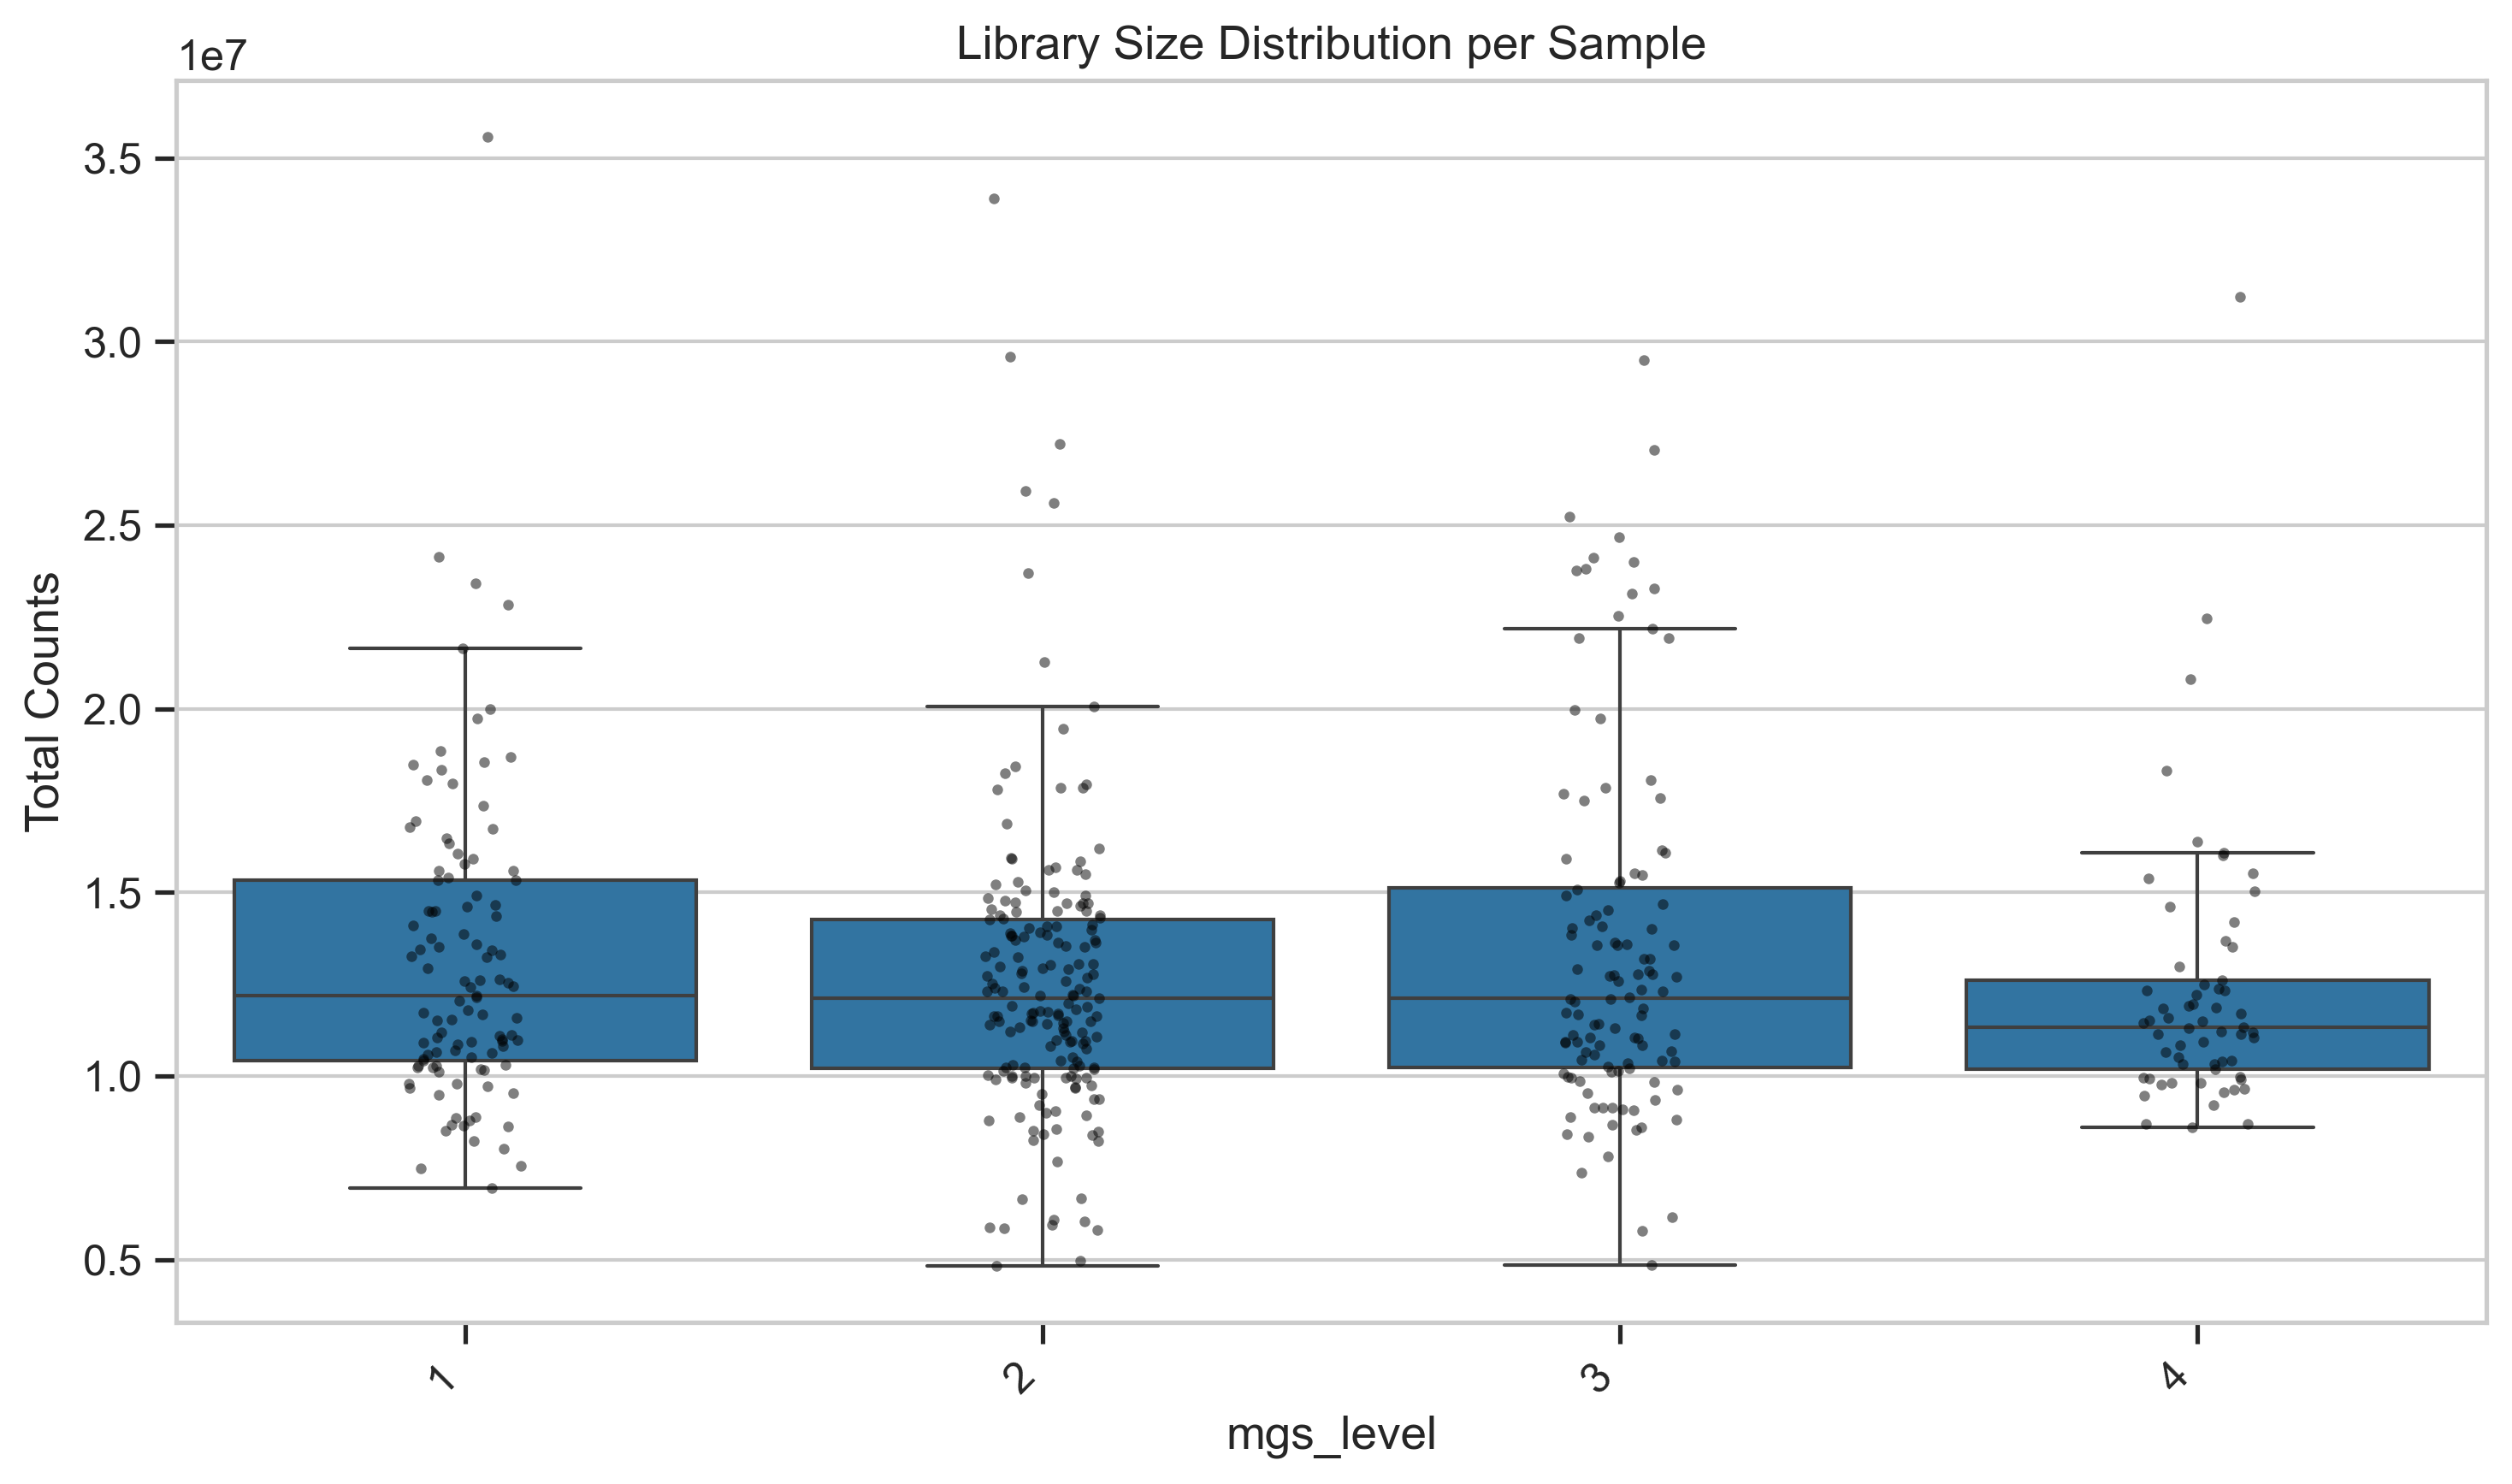

In [ ]:
if combined_data is not None:
    # Extract count columns (they start with ENSG) and metadata columns
    gene_cols_eda = [col for col in combined_data.columns if col.startswith(config['preprocessing']['gene_cols_prefix'])]
    metadata_cols_eda = [col for col in combined_data.columns if not col.startswith(config['preprocessing']['gene_cols_prefix'])]
    
    counts_eda = combined_data[gene_cols_eda]
    metadata_eda = combined_data[metadata_cols_eda]

    # Plot Library Size (Total Counts per Sample)
    plotting.plot_library_size(
        counts_eda,
        metadata_eda,
        color_by='mgs_level', # by AMD stage
        save_path=os.path.join(notebook_plot_dir, "eda_library_size_mgs.png")
    )
    # Display the plot
    display(Image(filename=os.path.join(notebook_plot_dir, "eda_library_size_mgs.png")))

    
    # TBD:      Add another plot colored by otehr metadata column
    # Example:  plotting.plot_library_size(counts_eda, metadata_eda, color_by='sex', save_path=...)

2025-04-09 18:29:57,000 - INFO - Plotting detected genes distribution (threshold > 10, color by: mgs_level)...
2025-04-09 18:29:57,178 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-04-09 18:29:57,186 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-04-09 18:29:57,212 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-04-09 18:29:57,216 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plottin

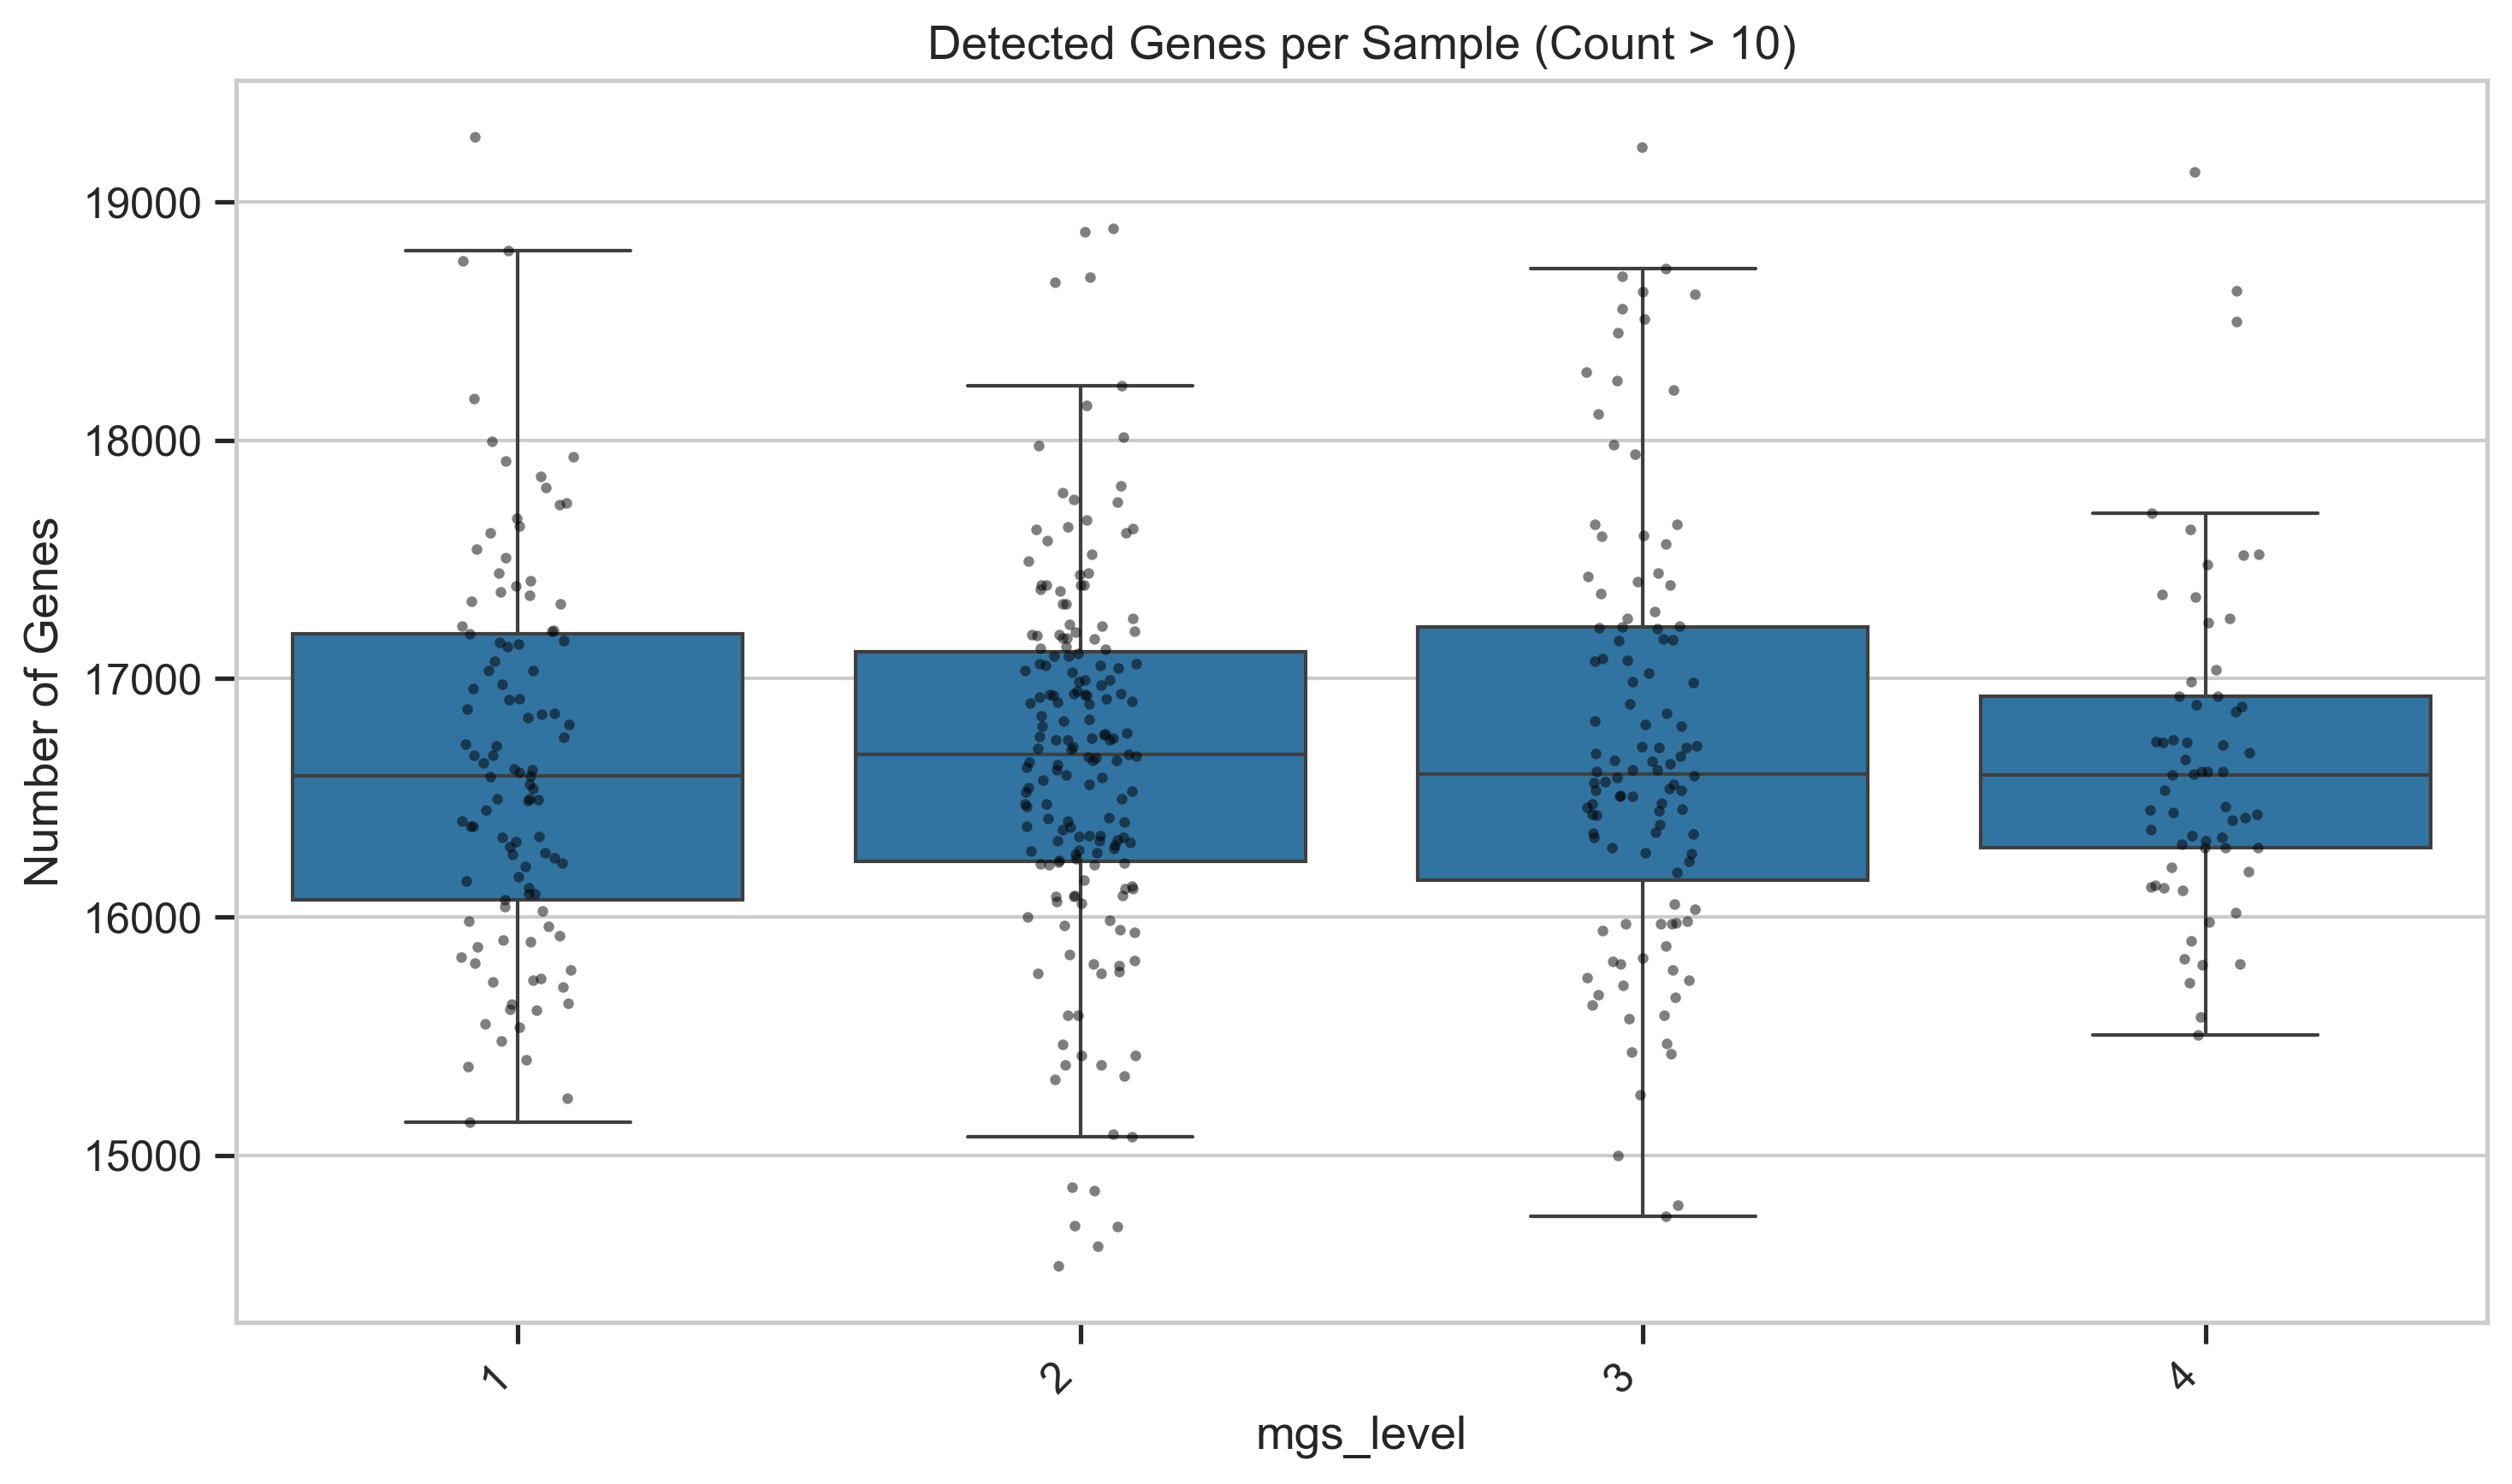

In [ ]:
if combined_data is not None:
    # Plot Detected Genes (Count > 10) per Sample
    # NOTE: In the preprocessing script, we will also use min percentage of samples to be considered detected
    plotting.plot_detected_genes(
        counts_eda,
        threshold=10, # Minimum count threshold for detected genes
        metadata_df=metadata_eda,
        color_by='mgs_level',
        save_path=os.path.join(notebook_plot_dir, "eda_detected_genes_mgs.png")
    )
    # Display the plot
    display(Image(filename=os.path.join(notebook_plot_dir, "eda_detected_genes_mgs.png")))

    # TBD: plotting.plot_detected_genes(counts_eda, threshold=0, metadata_df=metadata_eda, color_by='rin', save_path=...) # Color by RIN

2025-04-09 18:30:45,613 - INFO - Plotting gene mean vs variance...
2025-04-09 18:30:46,386 - INFO - Plot saved to /Users/elenki/Documents/UofU/spring-2025/deep-learning/semester_project/amd_dca/notebooks/eda_plots/eda_mean_variance.png


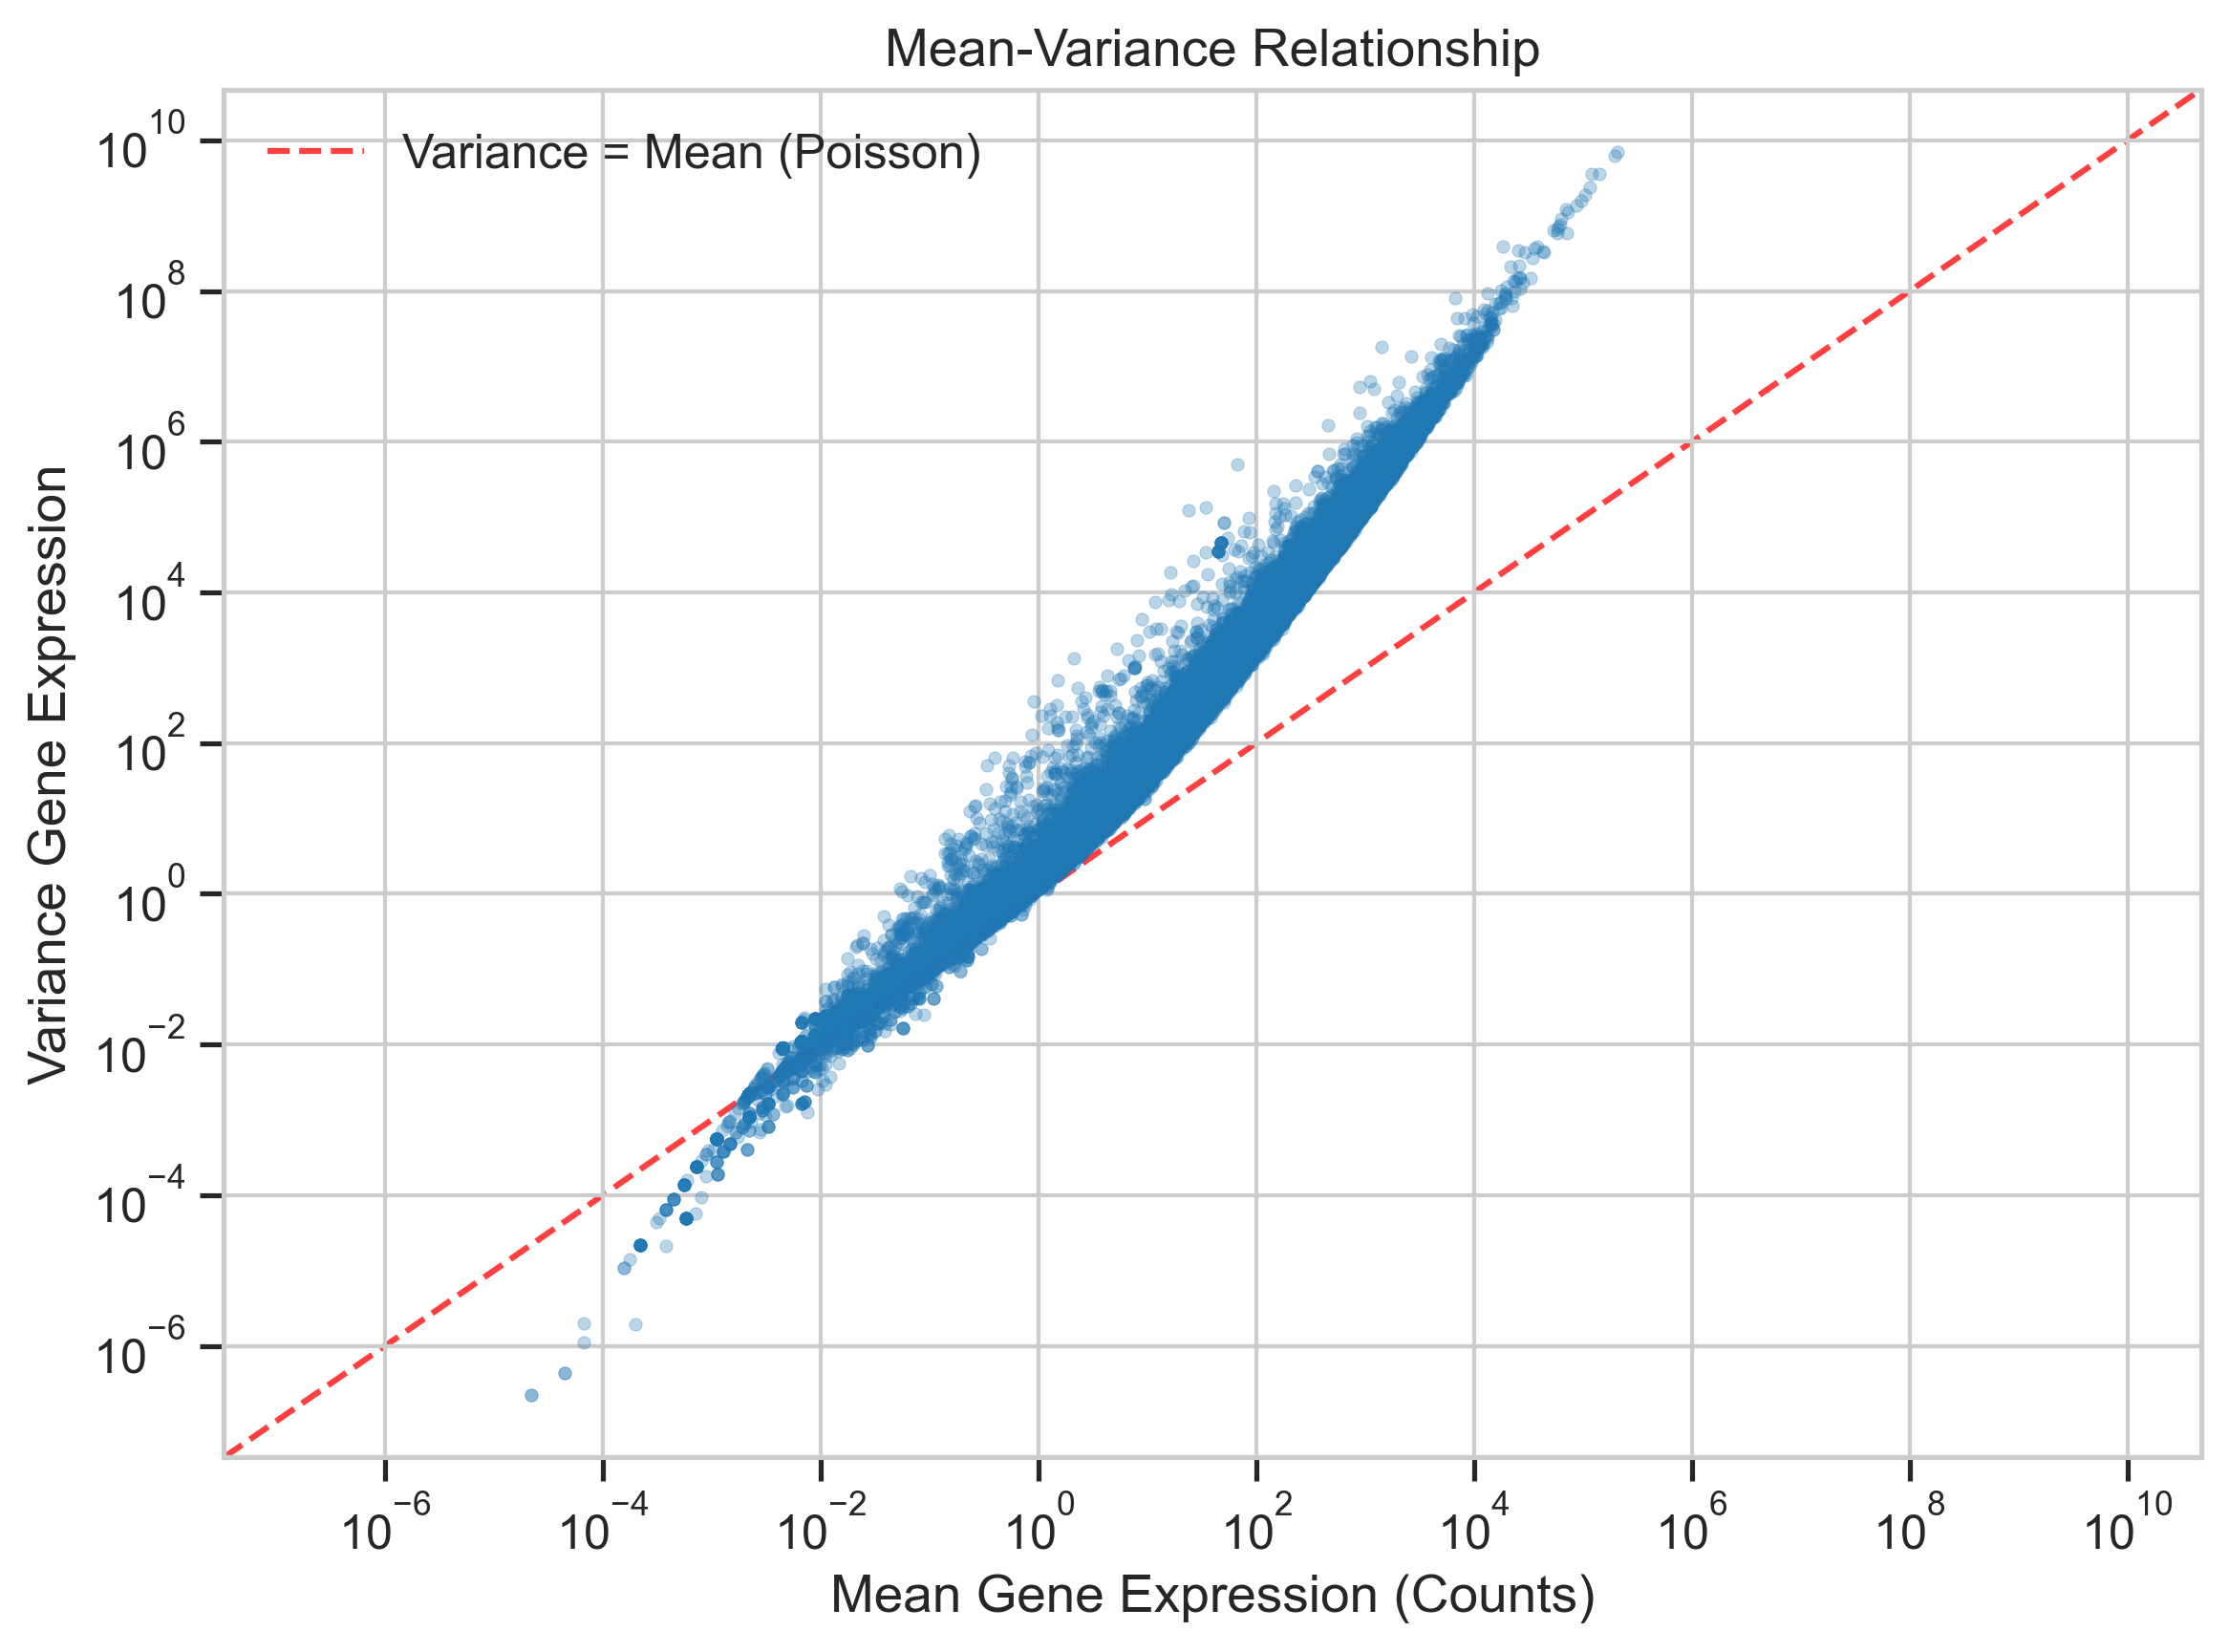

In [21]:
if combined_data is not None:
    # Plot Mean vs Variance across genes
    plotting.plot_gene_mean_variance(
        counts_eda,
        save_path=os.path.join(notebook_plot_dir, "eda_mean_variance.png")
    )

# display saved plot
display(Image(filename=os.path.join(notebook_plot_dir, "eda_mean_variance.png")))

## 3. Sample Filtering

Apply quality control filters based on metadata. The configuration specifies filtering samples with `rin` below a threshold.

In [22]:
if combined_data is not None:
    combined_data_qc = preprocess.filter_samples(combined_data, config)
    print(f"Shape after sample QC: {combined_data_qc.shape}")

2025-04-09 18:31:11,550 - INFO - Filtering samples by RIN >= 6.0...
2025-04-09 18:31:12,097 - INFO - Samples remaining after RIN filter: 441 (removed 12)
Shape after sample QC: (441, 58077)


## 4. Gene Filtering

Remove genes that are lowly expressed across the remaining high-quality samples. We use the criteria defined in `config.yaml` (min counts in min % of samples).


In [23]:
if 'combined_data_qc' in locals() and combined_data_qc is not None:
    # Separate counts and metadata *after* sample QC
    gene_cols_qc = [col for col in combined_data_qc.columns if col.startswith(config['preprocessing']['gene_cols_prefix'])]
    metadata_cols_qc = config['preprocessing']['metadata_cols']
    metadata_cols_qc = [col for col in metadata_cols_qc if col in combined_data_qc.columns] # Ensure cols exist

    counts_qc_df = combined_data_qc[gene_cols_qc]
    metadata_qc_df = combined_data_qc[metadata_cols_qc]

    # Apply gene filter
    counts_final_df = preprocess.filter_genes(counts_qc_df, config)
    metadata_final_df = metadata_qc_df.loc[counts_final_df.index] # Keep corresponding metadata

    print(f"Shape of final counts matrix: {counts_final_df.shape}")
    print(f"Shape of final metadata matrix: {metadata_final_df.shape}")

2025-04-09 18:32:55,656 - INFO - Filtering genes (min_count=10, min_samples_pct=0.1)...
2025-04-09 18:32:55,736 - INFO - Genes remaining after filtering: 18831 (removed 39220)
Shape of final counts matrix: (441, 18831)
Shape of final metadata matrix: (441, 5)


## 5. Zero-Inflation Analysis

Now we analyze the filtered counts (`counts_final_df`) to decide if a standard Negative Binomial (NB) or a Zero-Inflated Negative Binomial (ZINB) model is more appropriate for the autoencoder's loss function.
- **Stats:** Calculate overall sparsity and statistics on the fraction of zeros per gene.
- **Plot:** Visualize the relationship between mean gene expression and the fraction of zero counts per gene. A high proportion of zeros for medium-to-high expression genes suggests zero-inflation.


2025-04-09 18:15:12,227 - INFO - Calculating zero inflation statistics...
2025-04-09 18:15:12,273 - INFO - Overall sparsity: 0.009

Zero Inflation Statistics:
  total_samples: 441
  total_genes: 18831
  total_counts: 8304471
  total_zeros: 74920
  overall_sparsity: 0.009
  zero_fraction_per_gene_stats:
    count: 18831.000
    mean: 0.009
    std: 0.049
    min: 0.000
    25%: 0.000
    50%: 0.000
    75%: 0.000
    max: 0.859
2025-04-09 18:15:12,273 - INFO - Plotting mean expression vs zero fraction...
2025-04-09 18:15:12,523 - INFO - Plot saved to /Users/elenki/Documents/UofU/spring-2025/deep-learning/semester_project/amd_dca/notebooks/eda_plots/eda_mean_vs_zeros.png


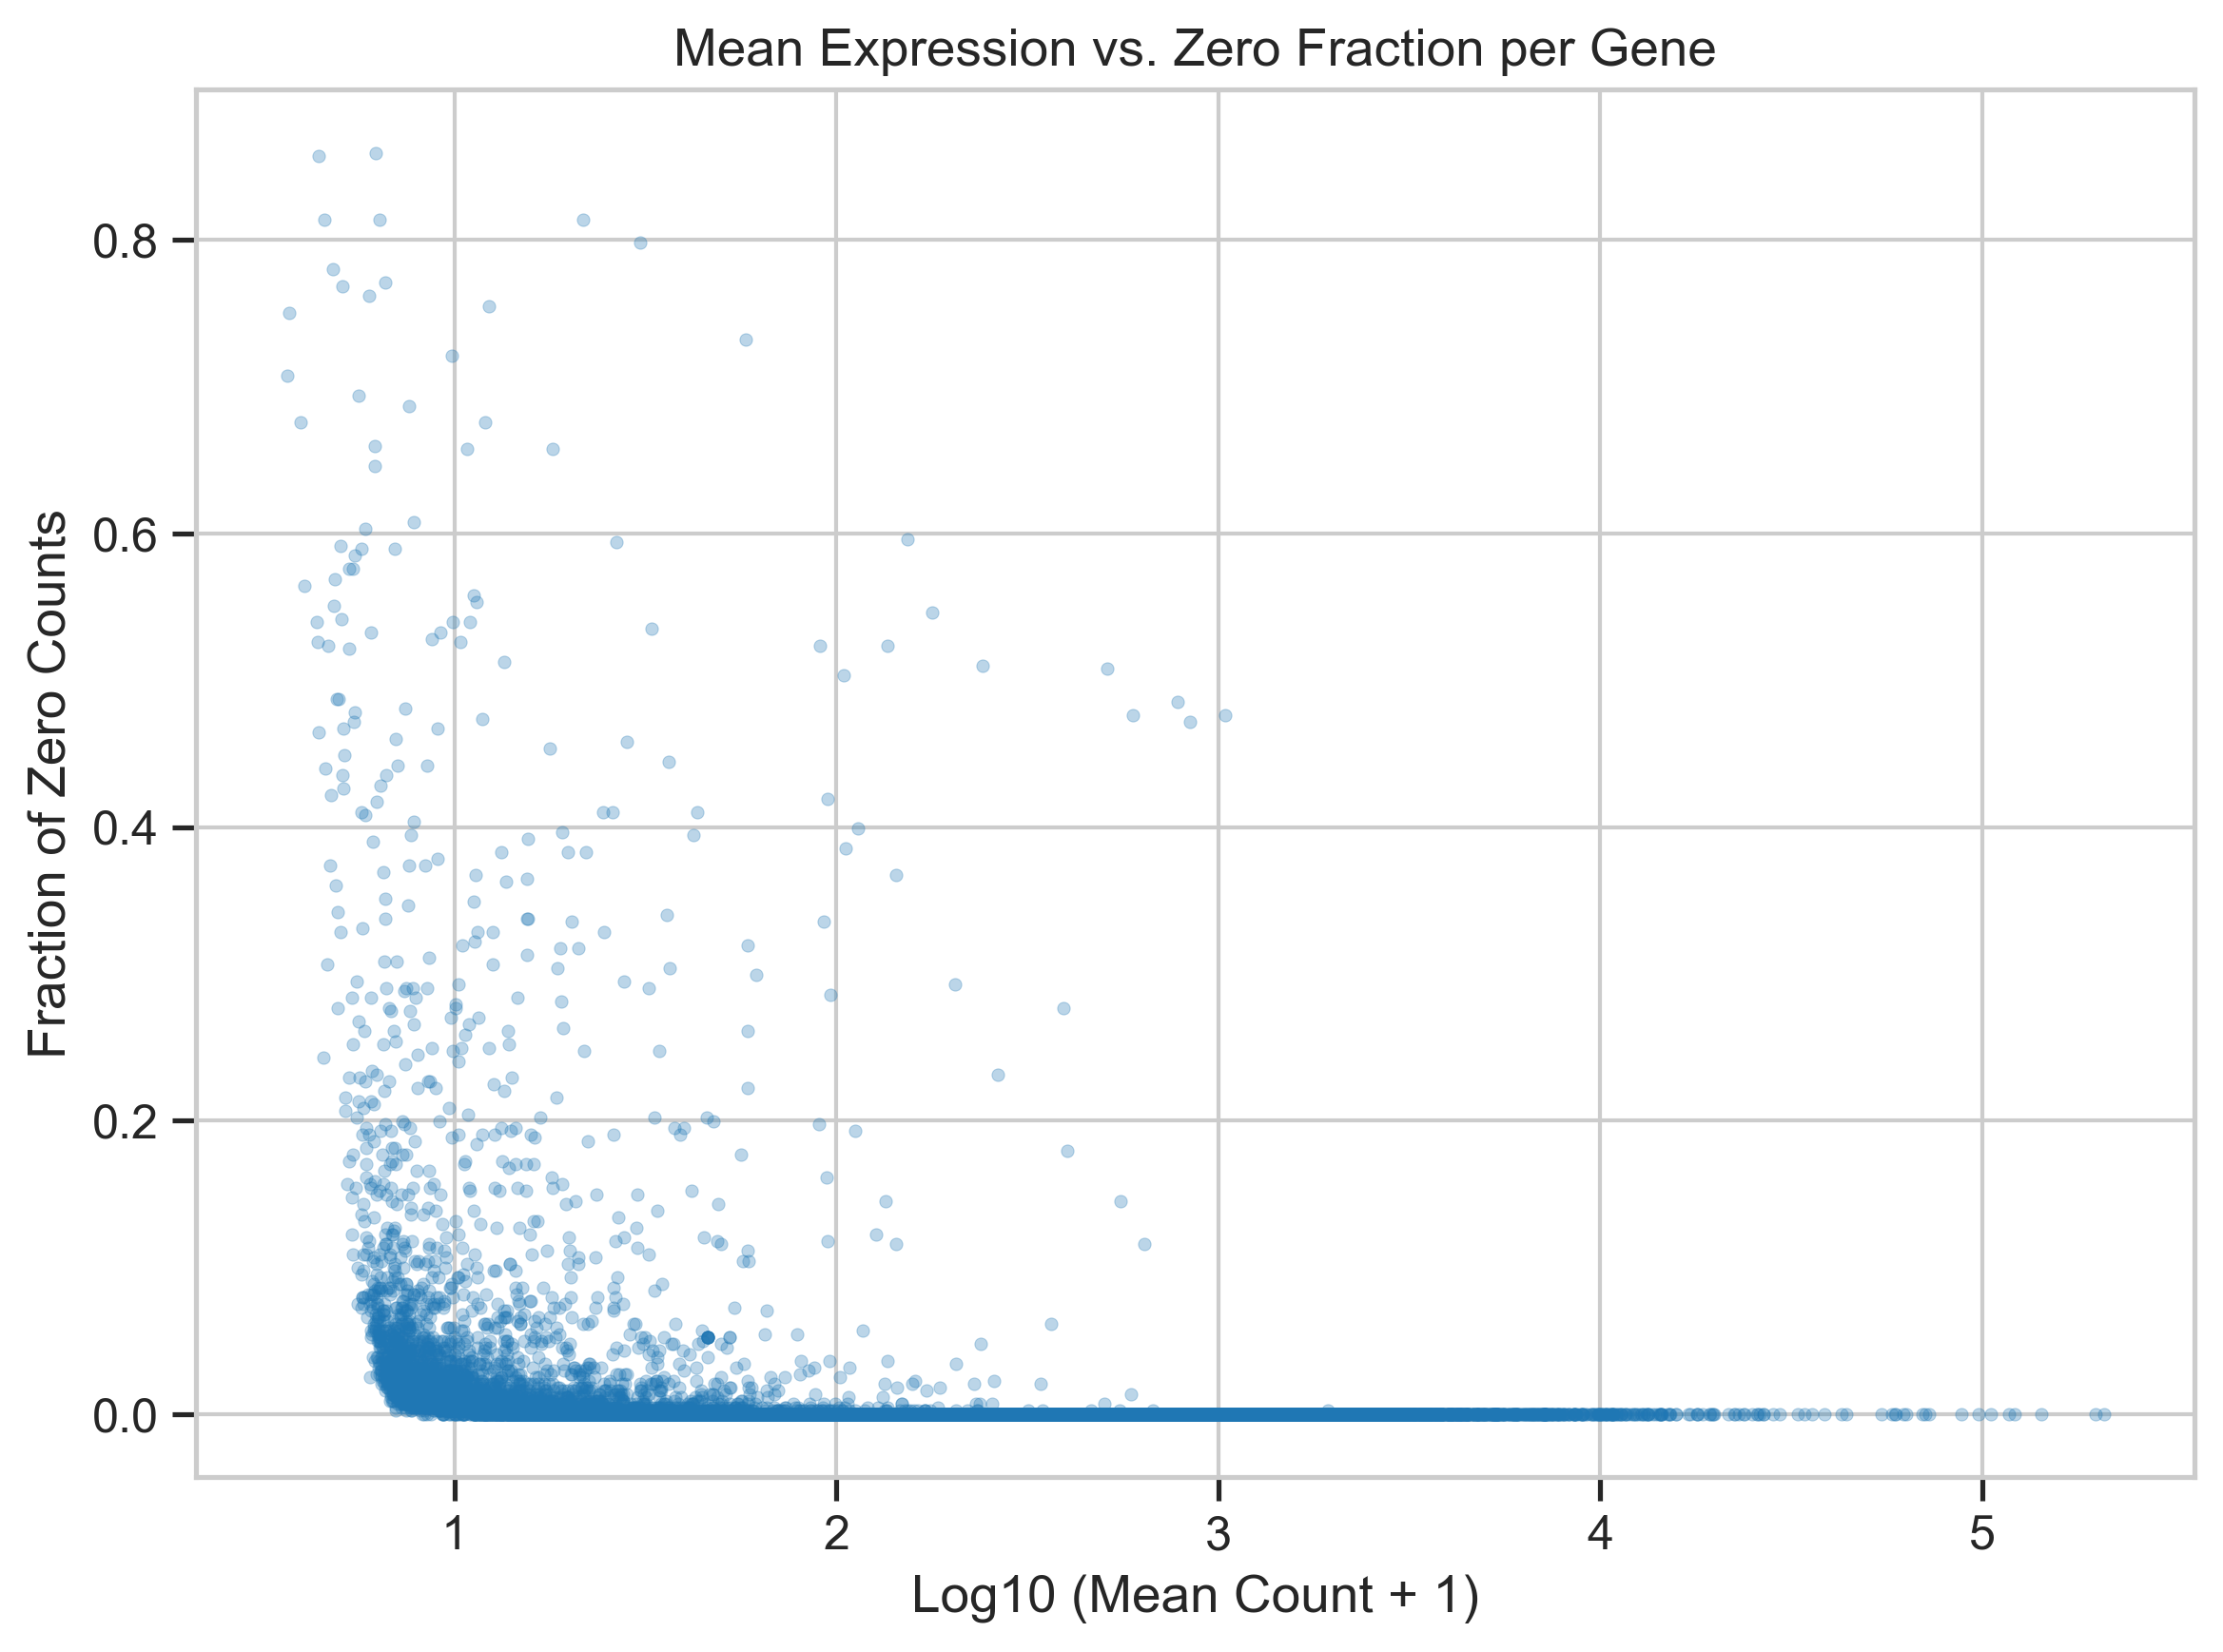

In [17]:
if 'counts_final_df' in locals() and counts_final_df is not None:
    # Calculate Stats
    zero_stats = preprocess.get_zero_inflation_stats(counts_final_df)
    print("\nZero Inflation Statistics:")
    for key, value in zero_stats.items():
        if isinstance(value, dict):
            print(f"  {key}:")
            for sub_key, sub_value in value.items():
                print(f"    {sub_key}: {sub_value:.3f}")
        else:
            print(f"  {key}: {value:.3f}" if isinstance(value, float) else f"  {key}: {value}")

    # Generate Plot
    plotting.plot_mean_vs_zeros(
        counts_final_df,
        save_path=os.path.join(notebook_plot_dir, "eda_mean_vs_zeros.png")
    )
    # Display the plot
    display(Image(filename=os.path.join(notebook_plot_dir, "eda_mean_vs_zeros.png")))

**Decision Point: NB or ZINB?**

*Based on the overall sparsity and the mean-vs-zeros plot:*
- If sparsity is moderate and the plot shows a clear decrease in zero fraction as mean expression increases, **NB** is likely sufficient.
- If sparsity is high OR the plot shows many genes with high mean expression still having a large fraction of zeros, **ZINB** might be more appropriate.

*Initial Decision:* Based on the plot, it appears that the data is **not** overly sparse, and the mean-vs-zeros relationship is not strongly indicative of zero-inflation. Therefore, we will proceed with the **[NB]** distribution for the model. 

NOTE: TBD - (Update `config.yaml` if necessary).



## 6. Size Factor Calculation (EDA)

Calculate library size normalization factors using the median-of-ratios method (similar to DESeq2) on the final filtered raw counts. This helps understand library depth variation.

* Median-of-ratios: For each sample, compute the ratio of each gene's count to the geometric mean of counts across all samples. The size factor is the median of these ratios.

```math
\begin{equation}
\text{Size Factor}_i = \text{median}\left(\frac{x_{ij}}{\text{geometric mean}(x_{j})}\right)
\end{equation}
```


where:
```math
\begin{equation}
x_{ij} = \text{count for gene } j \text{ in sample } i
\end{equation}
```
```math
\begin{equation}
\text{geometric mean}(x_{j}) = \left(\prod_{i=1}^{n} x_{ij}\right)^{1/n}
\end{equation}
```

- The geometric mean is calculated across all samples for each gene.
- This normalization helps adjust for differences in sequencing depth and RNA composition across samples, making the data more comparable.

2025-04-09 18:18:39,198 - INFO - Calculating size factors using median-of-ratios method...
2025-04-09 18:18:39,208 - WARNING - Input DataFrame has more genes than samples. Ensure samples are rows.
2025-04-09 18:18:39,614 - INFO - Calculated size factors for 441 samples.

Size Factor Summary Stats:


count    441.000000
mean       1.067125
std        0.362158
min        0.391862
25%        0.840356
50%        0.984576
75%        1.193320
max        2.905414
dtype: float64

2025-04-09 18:18:39,631 - INFO - Plotting size factor distribution (color by: mgs_level)...
2025-04-09 18:18:39,703 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-04-09 18:18:39,713 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-04-09 18:18:39,795 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-04-09 18:18:39,813 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-04-09 18:18

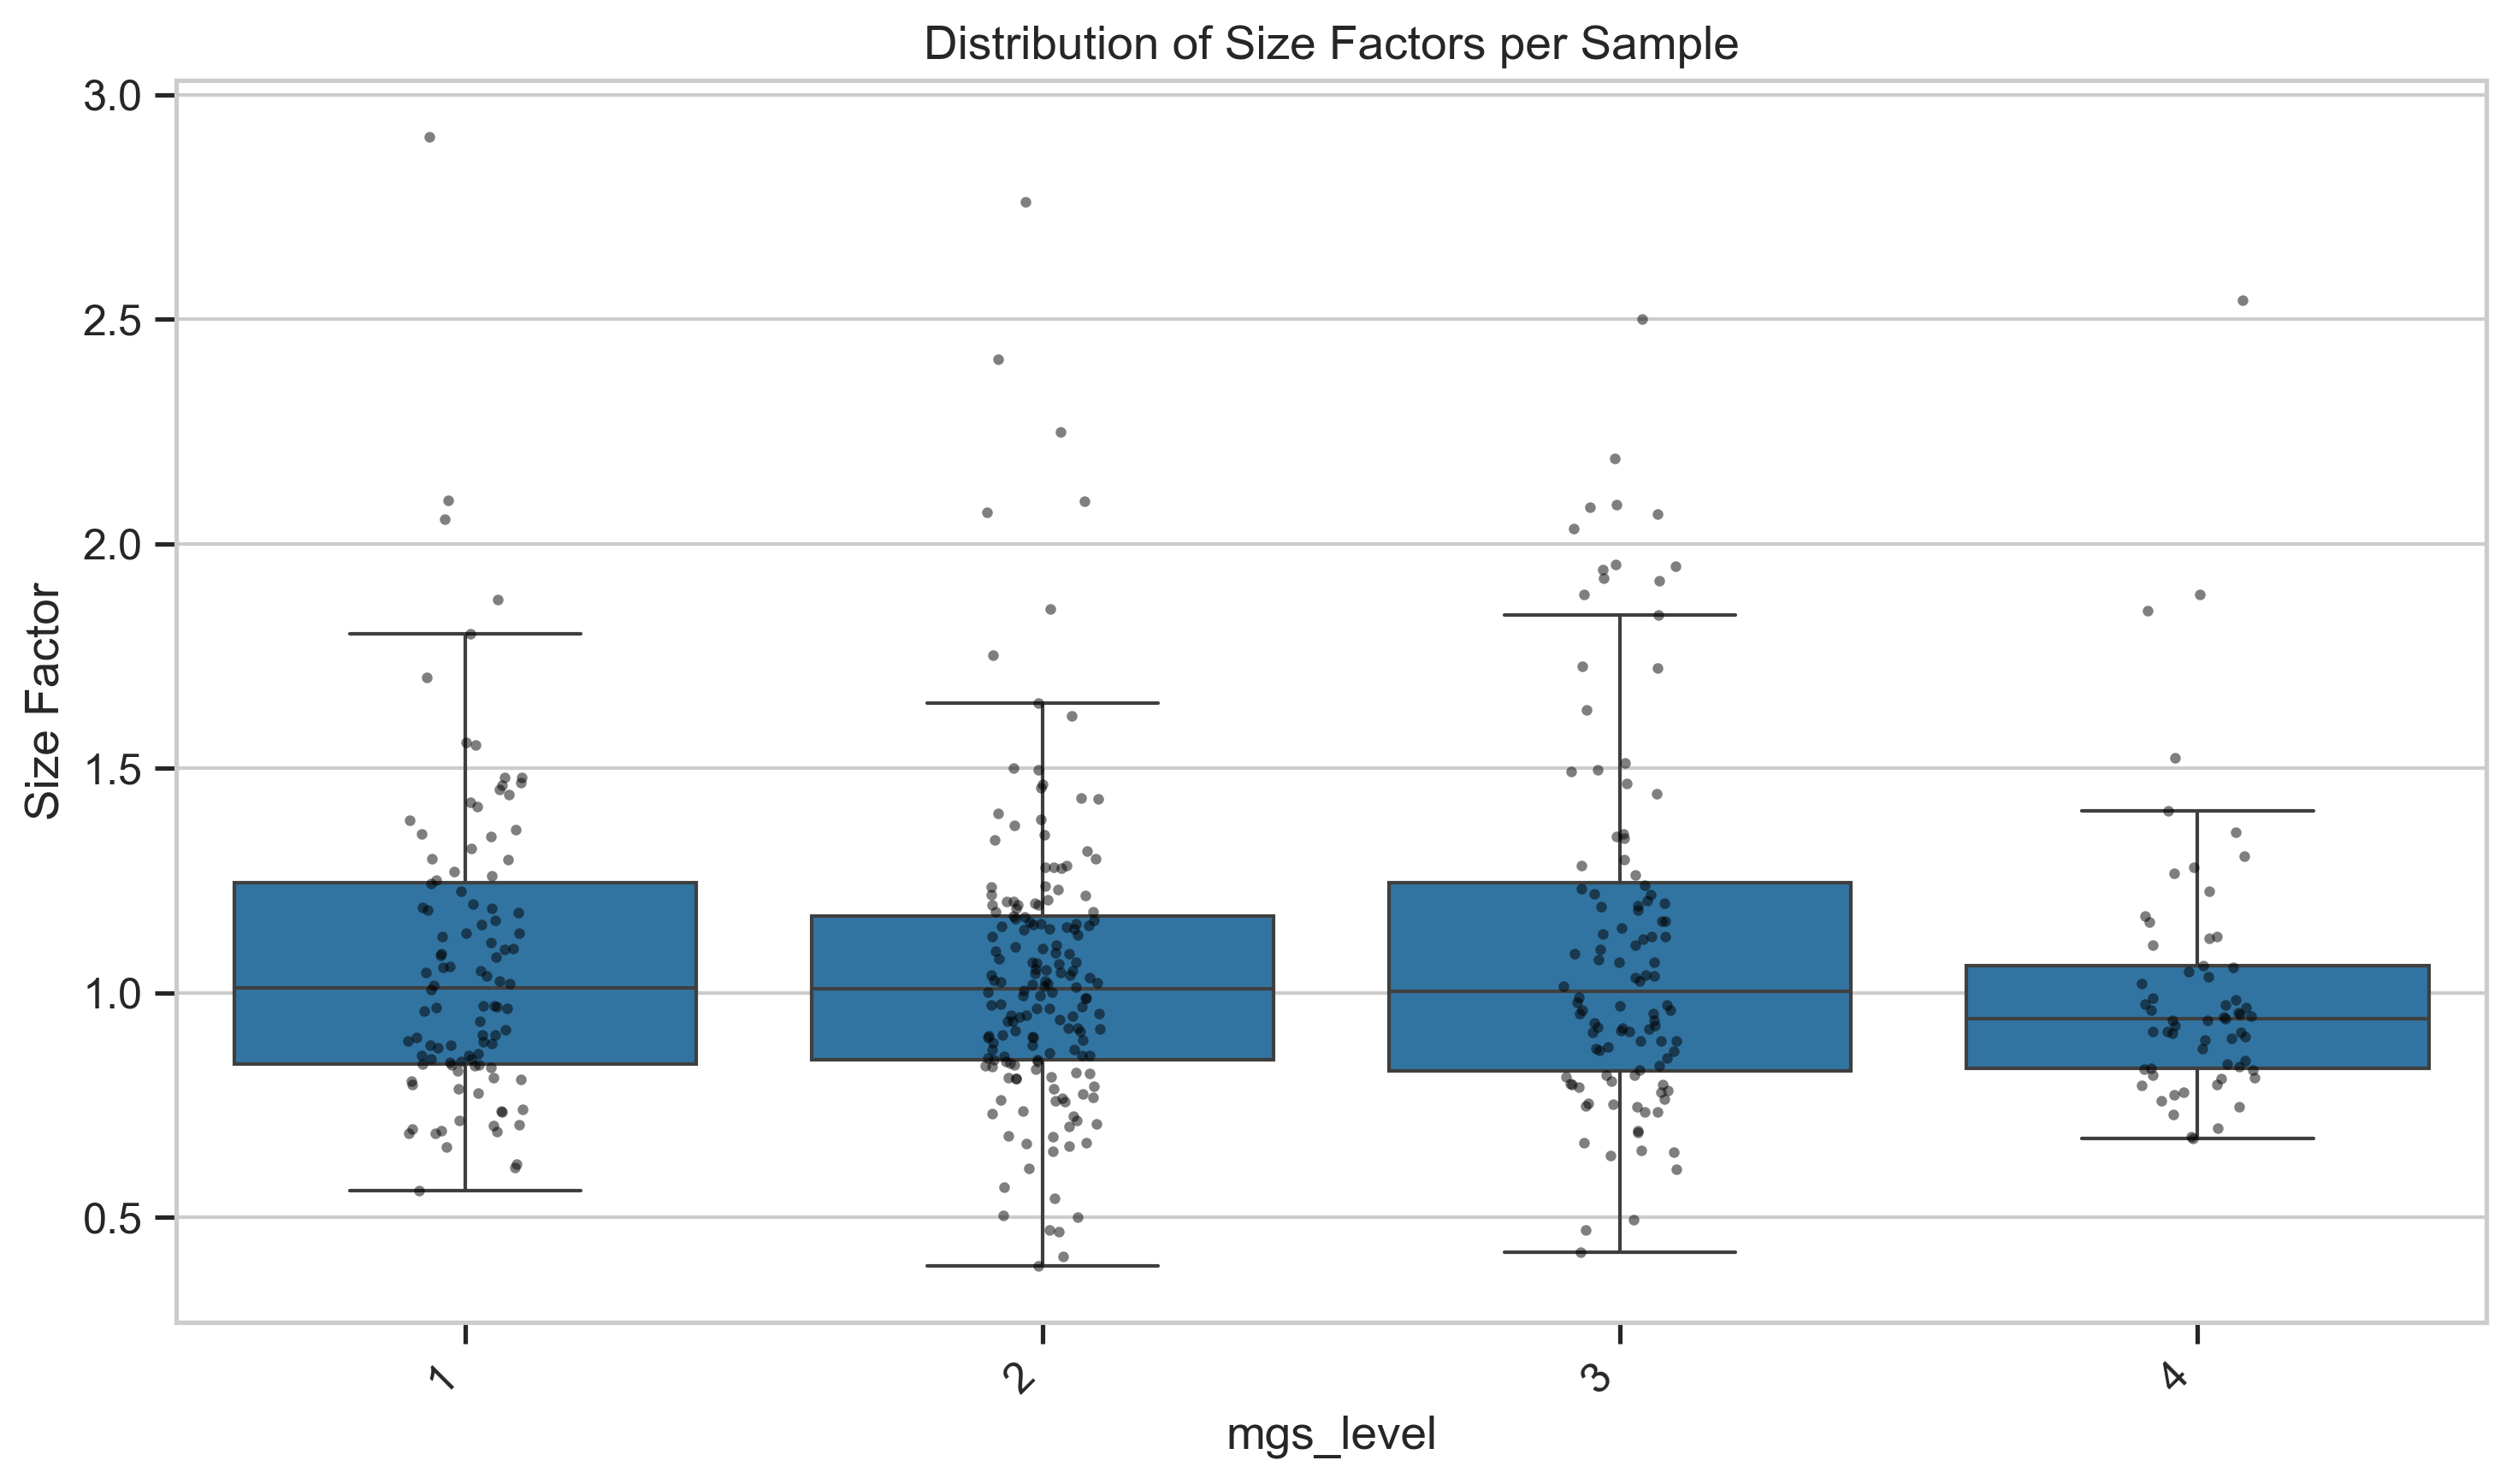

In [18]:
if 'counts_final_df' in locals() and counts_final_df is not None:
    size_factors = preprocess.calculate_size_factors(counts_final_df)
    print("\nSize Factor Summary Stats:")
    display(size_factors.describe())

    plotting.plot_size_factor_distribution(
        size_factors,
        metadata_final_df,
        color_by='mgs_level', # Or color by batch if available
        save_path=os.path.join(notebook_plot_dir, "eda_size_factors.png")
    )
    # Display the plot
    display(Image(filename=os.path.join(notebook_plot_dir, "eda_size_factors.png")))

## 7. Network Input Transformation (X) vs Loss Target (Y)

Neural networks train more stably with inputs that have a reduced dynamic range and are less skewed than raw counts. However, our count-based loss function (NB/ZINB) needs the original raw counts.

- **Network Input (X):** We will use `log1p` (`log(counts + 1)`) transformed counts. This stabilizes variance and handles zeros.
- **Loss Target (Y):** We will use the raw, filtered counts (`counts_final_df`).

Let's visualize the effect of `log1p` on an example gene.



Visualizing transformations for example gene: ENSG00000198886
2025-04-09 18:19:12,424 - INFO - Plotting count transformations for: ENSG00000198886
2025-04-09 18:19:12,869 - INFO - Plot saved to /Users/elenki/Documents/UofU/spring-2025/deep-learning/semester_project/amd_dca/notebooks/eda_plots/eda_ENSG00000198886_transformations.png


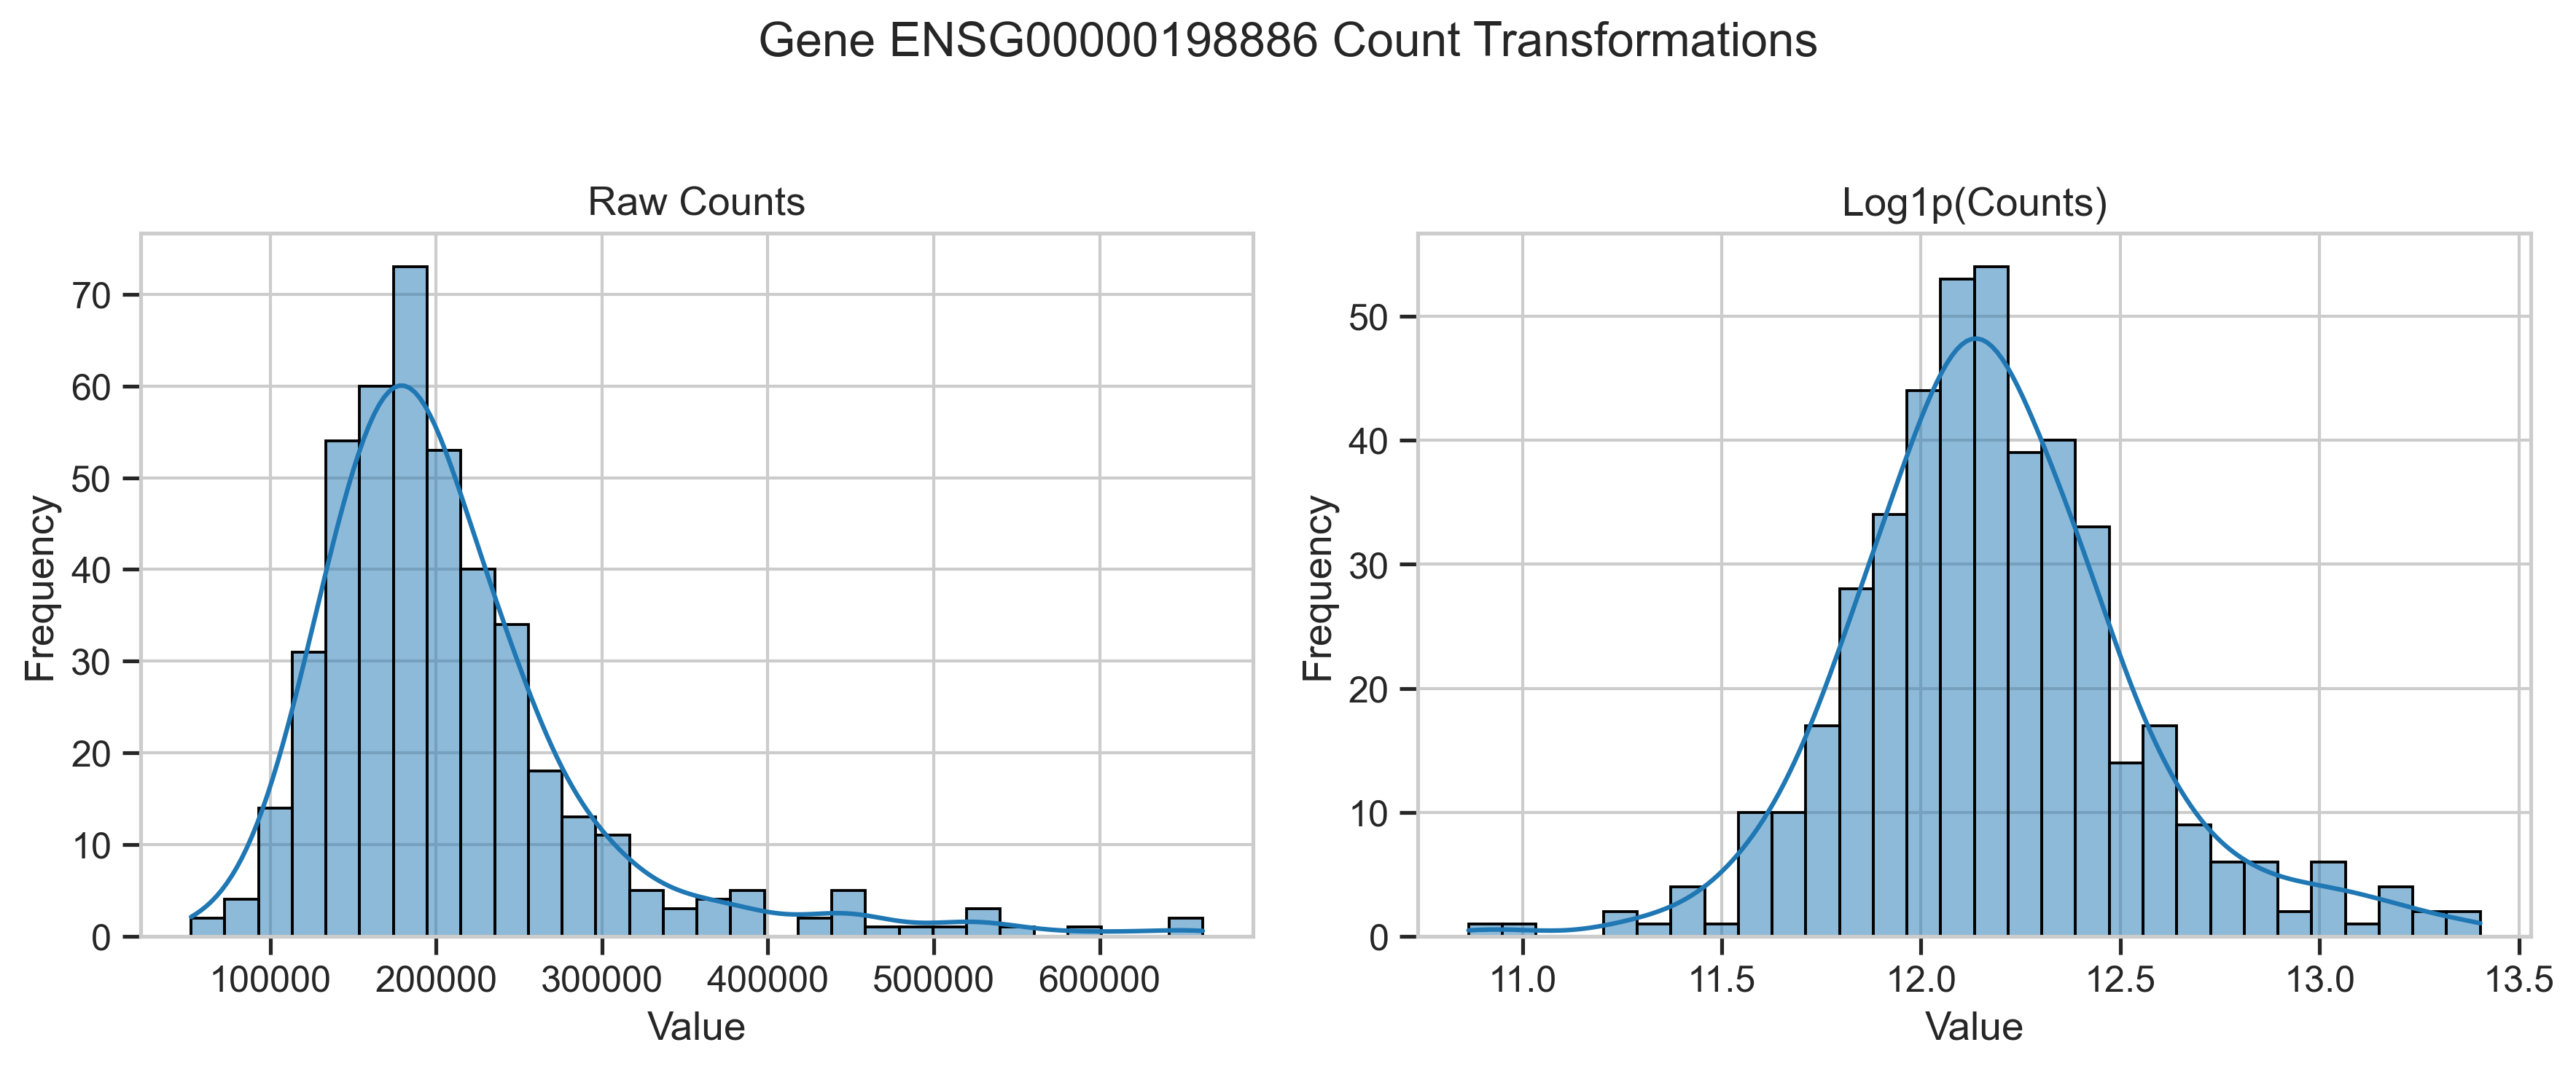

In [19]:
if 'counts_final_df' in locals() and counts_final_df is not None:
    # Select an example gene (e.g., a highly expressed one)
    example_gene = counts_final_df.mean().sort_values(ascending=False).index[0]
    print(f"\nVisualizing transformations for example gene: {example_gene}")

    plotting.plot_count_transformations(
        counts_final_df[example_gene],
        # Optionally provide size factors if you want to see that effect too
        # size_factor=size_factors.loc[counts_final_df.index[0]], # Example for first sample
        # mean_size_factor=size_factors.mean(),
        title=f"Gene {example_gene} Count Transformations",
        save_path=os.path.join(notebook_plot_dir, f"eda_{example_gene}_transformations.png")
    )
    # Display the plot
    display(Image(filename=os.path.join(notebook_plot_dir, f"eda_{example_gene}_transformations.png")))

## 8. Covariate Plan

Based on `config.yaml`, the following covariates will be prepared:
`{config['preprocessing']['covariates']}`

**Plan:**
1. Select these columns from `metadata_final_df`.
2. Handle missing values (impute using training set mean/mode).
3. Scale numerical covariates (`age`, `rin`, `postmortem_interval_hrs`) using `StandardScaler` (fit on training set).
4. One-hot encode categorical covariates (`sex`, potentially `batch_id`) using `OneHotEncoder` (fit on training set).
5. Concatenate these processed covariates with the `log1p`-scaled counts to form the final input matrix **X** for the autoencoder. This helps the model explicitly account for these factors during denoising.

## 9. Data Splitting Plan

The data (samples in `counts_final_df` and `metadata_final_df`) will be split into training, validation, and test sets using the ratios defined in `config.yaml`. Stratification will be attempted using the `{config['preprocessing']['stratify_on']}` column to ensure representative splits. The actual split will happen in the `run_preprocessing.py` script.
"""

## 10. EDA Summary & Preprocessing Plan Recap

- Data loaded and sample IDs mapped between counts and metadata.
- Initial exploration showed variations in library size and detected genes.
- Samples filtered based on RIN threshold ({config['preprocessing']['rin_threshold']}).
- Genes filtered based on expression ({config['preprocessing']['min_counts_per_gene']} counts in {config['preprocessing']['min_samples_per_gene_pct']*100}% of samples).
- Zero-inflation analysis suggests using the **[NB/ZINB - Fill this in]** model/loss.
- Network input (X) will use `log1p(counts)` concatenated with processed covariates: {config['preprocessing']['covariates']}.
- Loss function target (Y) will use raw filtered counts.
- Data will be split into train/validation/test sets, stratified by `{config['preprocessing']['stratify_on']}`.

**Next Step:** Execute `scripts/run_preprocessing.py` to perform these steps and save the final processed data matrices needed for model training.
